In [6]:
from __future__ import division
import os, sys
# 启动绘图
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
# 运行代码时会有很多warning输出，如提醒新版本之类的
import warnings
warnings.filterwarnings('ignore','ValueWarning')

array([0.75041083, 0.98408497, 0.14260491, 0.28253518, 0.48306747,
       0.06028299, 0.16350979, 0.39730406, 0.60585247, 0.69211332,
       0.49747049, 0.61969401, 0.50353857, 0.5618829 , 0.56314497,
       0.2527497 , 0.85953433, 0.97457062, 0.90032108, 0.54907841,
       0.25802452, 0.19057701, 0.33128918, 0.84787845, 0.50557789,
       0.86537607, 0.39242098, 0.831379  , 0.60377048, 0.24237419,
       0.45357695, 0.45031575, 0.37311798, 0.27338949, 0.14404984,
       0.05762189, 0.52917329, 0.44741282, 0.90595376, 0.071592  ,
       0.45920962, 0.56037412, 0.84479673, 0.22794694, 0.67134621,
       0.9266449 , 0.62236531, 0.80666635, 0.54002997, 0.37017534,
       0.98453542, 0.69679969, 0.19165092, 0.98925456, 0.19434444,
       0.50393066, 0.26870588, 0.07869246, 0.35131793, 0.36232219,
       0.52705952, 0.29377051, 0.60533317, 0.77622401, 0.29465024,
       0.92498254, 0.8848832 , 0.481734  , 0.36291571, 0.51568729,
       0.5170796 , 0.69958755, 0.75307018, 0.63292804, 0.82666

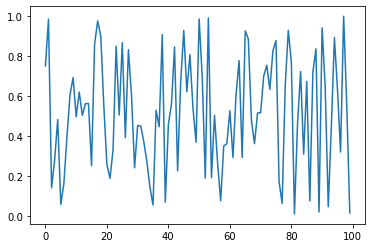

In [10]:
# 1. 生成随机序列
import numpy as npa
x = np.random.rand(100)
plt.plot(x) # 绘图，序列的时序图
x

（1）时序图检验。根据平稳时间序列的均值和方差都是常数的性质，平稳序列的时序图显示
该序列值始终在一个常数附近随机波动，而且波动的范围有界；如果有明显的趋势性或者周期
性，那它通常不是平稳序列。

In [9]:
# 2. ADF平稳性检验用来检验金融、经济时间序列数据的平稳性
from statsmodels.tsa.stattools import adfuller as ADF # 导入ADF检验
print("ADF平稳性检验结果为：") # Augmented Dickey-Fuller unit root test,返回的结果有ADF值、p值等
ADF(x) # 第一个返回值为ADF值，第二个为p值

ADF平稳性检验结果为：


(-8.268998063976788,
 4.850408018077372e-13,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 21.468332723110677)

In [11]:
# 3. 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print("白噪声检验结果为：") # 返回统计量和p值 
acorr_ljungbox(x,lags=1, return_df=False)

白噪声检验结果为：


(array([0.02629751]), array([0.87117587]))

白噪声检验:
* 统计量的p值(第二个返回值,0.1781) 大于显著性水平0.05，则表示该序列不能拒绝纯随机的原假设，即认为序列为纯随机序列，即白噪声序列，可以停止对该序列的分析。

如果白噪声统计量的p值小于显著性水平0.05，则以95%的置信水平拒绝原假设，认为序列为非白噪声序列。再综合ADF检验为平稳序列，则可以认为原序列为平稳非白噪声序列，适用于ARMA模型。

<ipython-input-12-3afac8f6e689>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(x,lags = 40).show() # 绘制原始序列的自相关图，默认lags=20，可以修改，这里最大值99（100个
<ipython-input-12-3afac8f6e689>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(x,lags = 40).show() # 绘制原始序列的偏自相关图


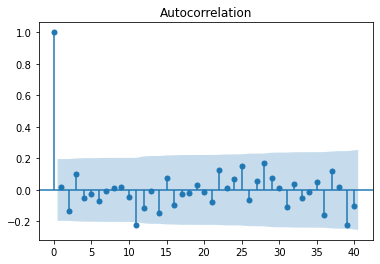

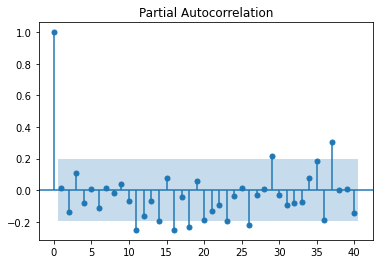

In [12]:
# 4. 计算绘制acf自相关系数图和pcaf偏自相关图
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(x,lags = 40).show() # 绘制原始序列的自相关图，默认lags=20，可以修改，这里最大值99（100个
plot_pacf(x,lags = 40).show() # 绘制原始序列的偏自相关图

自相关图检验。平稳序列具有短期相关性，这个性质表明对平稳序列而言通常只有近期的序列值对现时值的影响比较明显，间隔越远的过去值对现时值的影响越小。随着延迟期数的增加，平稳序列的自相关系数 （延迟 期） 会比较快的衰减趋向于零，并在零附近随机波动，而非平稳序列的自相关系数衰减的速度比较慢，这就是利用自相关图进行平稳性检验的标准。

1). AR模型(Auto Regressive)
$t$ 时刻的随机变量 $X_{t}$ 的取值 $x_{t}$ 是前 $p$ 期 $x_{t-1}, x_{t-2},...,x_{t-p}$ 的多元线性回归，认为
$x_{t}$主要是受过去 $p$ 期的序列值的影响。具有这样结构的模型称为 $ p$ 阶自回归模型，简记为$ AR(p)$
。
平稳AR模型的性质见下表：
| 统计量| 性质| 统计量| 性质|
均值 常数均值 自相关系数（ACF) 拖尾
方差 常数方差 偏自相关系数（PACF) $p$ 阶截尾

对于一个平稳 $ AR(p)$模型，求出延迟 $k$ 期自相关系数$ p_{k}$ 时，实际上得到的并不是 $X_{t}$ 与
$X_{t-k}$ 之间单纯的相关关系，因为 $X_{t}$ 同时还会受到中间 $k-1$ 个随机变量$X_{t-1},X_{t-
2},...,X_{t-k}$ 的影响，所以自相关系数 $ p_{k}$ 里实际上掺杂了其他变量对 $X_{t}$ 与 $X_{t-k}$ 的相关
影响，为了单纯地测度 $X_{t-k}$ 对 $X_{t}$的影响，引进了偏自相关系数的概念。
可以证明平稳 $ AR(p)$ 模型的偏自相关系数具有 $ p$ 阶截尾性。这个性质连同前面的自相关系数的拖尾
性是 $ AR(p)$ 模型重要的识别依据。

截尾是指时间序列的自相关函数（ACF）或偏自相关函数（PACF）在某阶后均为0的性质，在大于某个常
数k后快速趋于0 称为 k阶截尾
拖尾是ACF或PACF并不在某阶后均为0的性质，始终有非零取值，不会在k大于某个常数后就恒等于零(或 在0 附近随机波动)

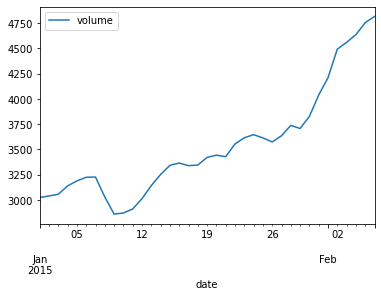

In [13]:
# 1. 加载数据，绘制原始的时序图
%matplotlib inline
import pandas as pd
data = pd.read_csv('data/arima_data.csv', index_col = 'date')
data.index = pd.to_datetime(data.index) # 将字符串索引转换成时间索引
data.plot() # 绘图原始序列的时序图
plt.show()
# 该时序图具有趋势性，不是平稳序列

<ipython-input-14-58af79178035>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(data,lags = 30).show() # 绘制原始序列的自相关图
<ipython-input-14-58af79178035>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(data).show() # 绘制原始序列的偏自相关图


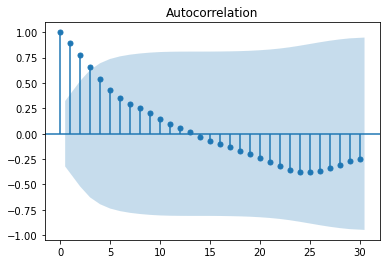

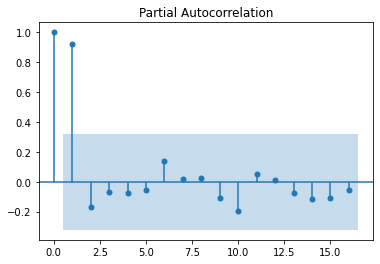

In [14]:
# 2. 计算绘制acf自相关系数图和pcaf偏自相关图
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data,lags = 30).show() # 绘制原始序列的自相关图
plot_pacf(data).show() # 绘制原始序列的偏自相关图

In [16]:
 #3. ADF平稳性检验进行单位根检验，常用来检验金融、经济时间序列数据的平稳性
from statsmodels.tsa.stattools import adfuller as ADF # 导入ADF检验，对观测值序列进行单位根检验
print("原始序列的ADF检验结果为:",ADF(data['volume'])) # ADF unit root test,返回的结果有ADF值、p值

原始序列的ADF检验结果为: (1.813771015094526, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.46989866024177)


In [17]:
# 4. 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print("原始序列的白噪声检验结果为：",acorr_ljungbox(data['volume'],lags=1, return_df=False))

原始序列的白噪声检验结果为： (array([32.0111333]), array([1.53291527e-08]))


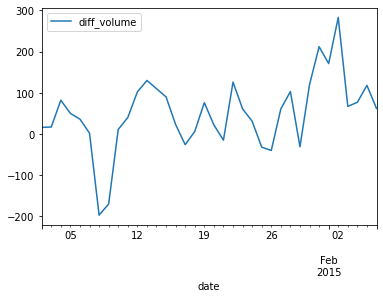

In [18]:
# 5. 差分后的时序图
%matplotlib inline
D_data = data.diff().dropna()
D_data.columns = ['diff_volume']
D_data.plot(); plt.show() # 差分序列的时序图

<ipython-input-19-5a58084c919c>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(D_data).show() # 差分序列的自相关图
<ipython-input-19-5a58084c919c>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(D_data).show() # 差分序列的偏自相关图


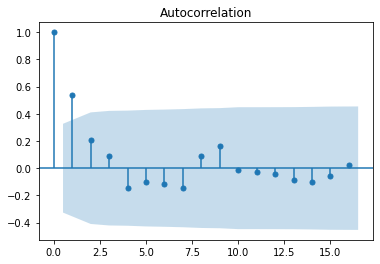

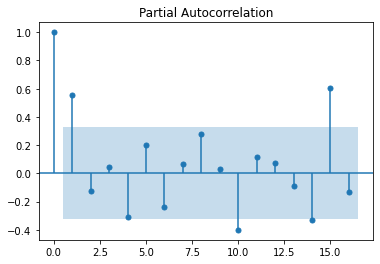

In [19]:
# 6. 差分后结果: 自相关图,偏自相关图
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(D_data).show() # 差分序列的自相关图
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show() # 差分序列的偏自相关图

In [20]:
# 7. 差分后序列做 ADF平稳检验
print("差分序列的ADF检验结果为：")
ADF(D_data['diff_volume']) # ADF平稳性检测

差分序列的ADF检验结果为：


(-3.1560562366723537,
 0.022673435440048798,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 287.5909090780334)